In [2]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pickle

In [3]:
dataset= r'data_rfe15.csv'
data=pd.DataFrame(pd.read_csv(dataset))

In [4]:
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [1438]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


param_grid = {
    'n_estimators': [30,40,50,80],
    'max_depth': [3,4,6,8],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1, 2, 4],
    'max_features':[1,2,3,4],
    'random_state':[0,1]
}

# Create a RandomForestClassifier object
rfc = RandomForestClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80, 'random_state': 1}
Best score: 0.8787878787878787


In [1457]:
clf = RandomForestClassifier(max_depth=6,random_state=1,min_samples_leaf=1,max_features=2,min_samples_split=2,n_estimators=100)
clf.fit(X,y)
#RF=clf.fit(X,y)

RandomForestClassifier(max_depth=6, max_features=2, random_state=1)

[0.         0.06666667 0.2        0.2        0.26666667 0.26666667
 0.33333333 0.33333333 0.46666667 0.46666667 1.        ]
[0.  0.  0.  0.2 0.2 0.6 0.6 0.8 0.8 1.  1. ]


<Figure size 640x480 with 0 Axes>

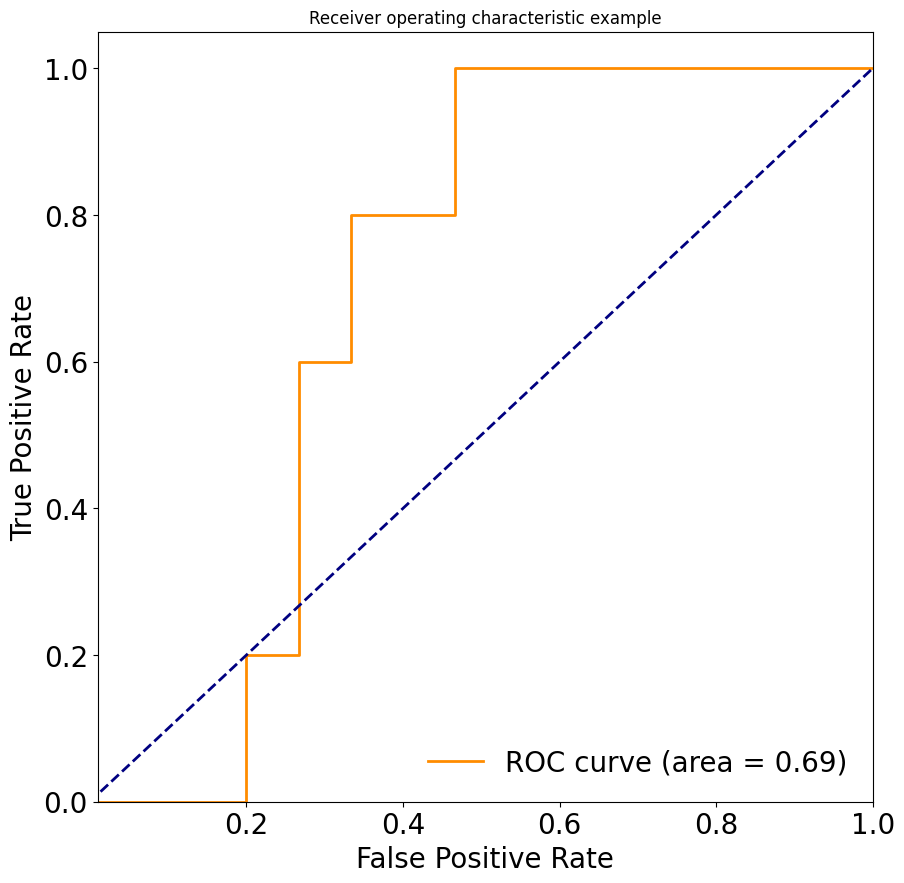

In [1458]:
#画出ROC曲线 RandomForest test
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

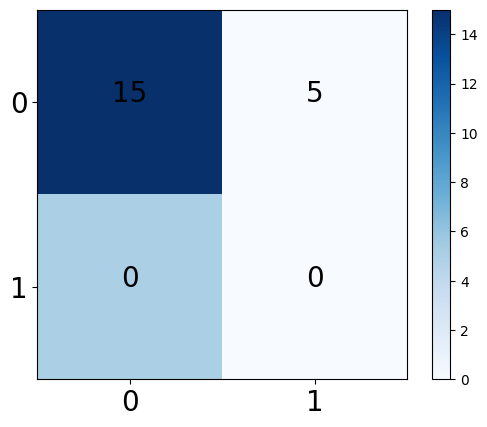

true: 15


In [1459]:
#画出混淆矩阵 RandomForest test
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

[0.         0.         0.         0.14285714 0.18367347 0.44897959
 0.48979592 0.55102041 0.59183673 0.6122449  0.67346939 0.7755102
 0.81632653 0.87755102 0.89795918 1.        ]
[0.         0.11111111 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


<Figure size 640x480 with 0 Axes>

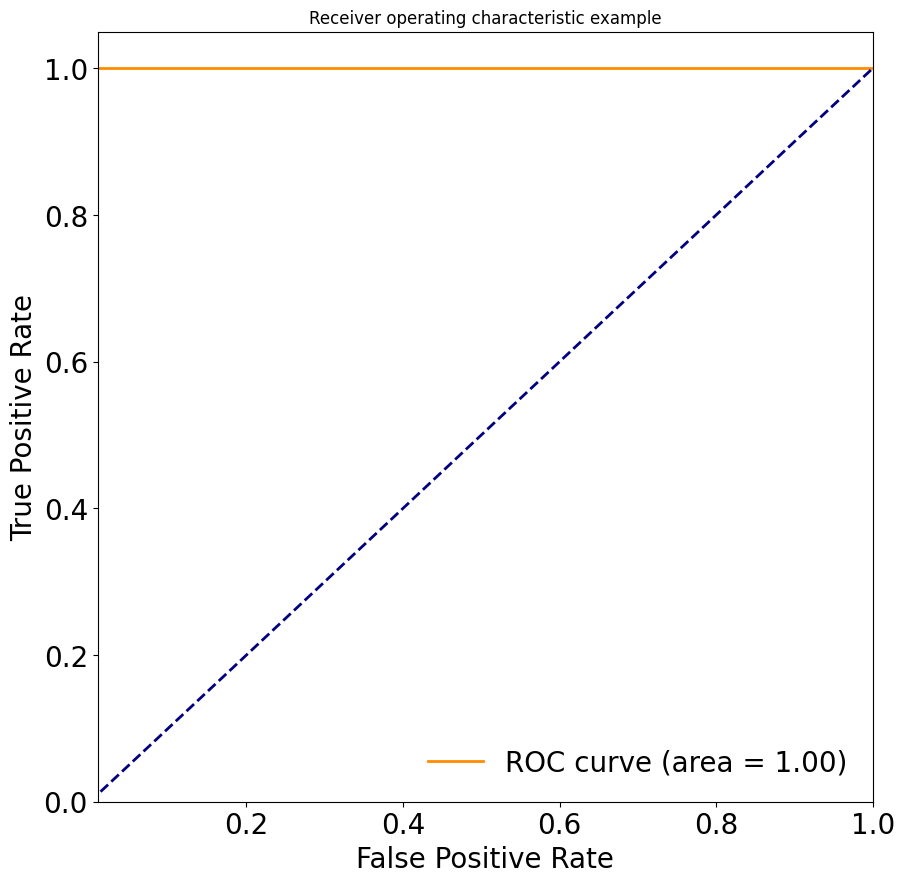

In [1460]:
#画出ROC曲线 RandomForest train的AUC
y_score = clf.fit(X, y).predict_proba(X_train)
fpr,tpr,threshold = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

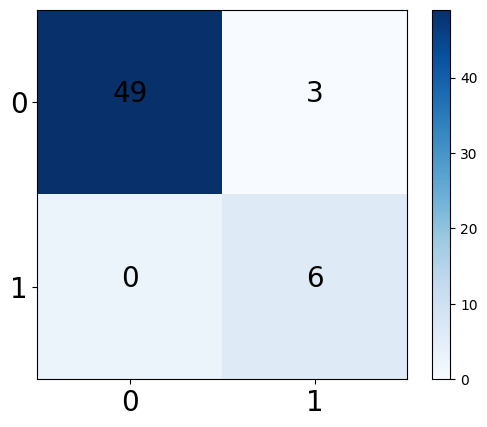

true: 55


In [1443]:
#画出混淆矩阵 RandomForest train 混淆矩阵
clf.fit(X, y)
prey=clf.predict(X_train)
true=0
for i in range(0,len(y_train)):
 if prey[i]==y_train[i]:
     true=true+1
C = confusion_matrix(y_train, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

In [400]:
#pickle.dump(RF,open("RF.dat","wb"))

In [993]:
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, make_scorer

# Generate some data for classification
X, y = X_train, y_train

# Define the ExtraTreesClassifier
et_clf = ExtraTreesClassifier()

# Define the parameters to search
params = {
    'n_estimators': [2,40,50,60,100],
    'max_depth': [None, 2,3,5, 7],
    'min_samples_split': [1,2, 3,5],
    'min_samples_leaf': [1, 2, 4,5],
    'max_features': ['sqrt', 'log2', None]
}

# Define the scoring metric
scoring = make_scorer(accuracy_score)

# Define the grid search with cross-validation
grid_search = GridSearchCV(et_clf, params, scoring=scoring, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 2}
Best Score:  0.9136363636363637


D:\anaconda\envs\py39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
1500 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1500 fits failed with the following error:
Traceback (most recent call last):
  File "D:\anaconda\envs\py39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\anaconda\envs\py39\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "D:\anaconda\envs\py39\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "D:\anaconda\envs\py39\lib\site-packages\joblib\para

In [347]:
#clf=ExtraTreesClassifier(n_estimators=2, max_depth=5,min_samples_split=2,max_features='sqrt',min_samples_leaf=2)

In [1232]:
clf=ExtraTreesClassifier(n_estimators=2, max_depth=4,min_samples_split=2,max_features='sqrt',min_samples_leaf=1)

[0.         0.         0.         0.06666667 0.2        0.2
 0.33333333 0.6        1.        ]
[0.  0.2 0.4 0.6 0.8 1.  1.  1.  1. ]


<Figure size 640x480 with 0 Axes>

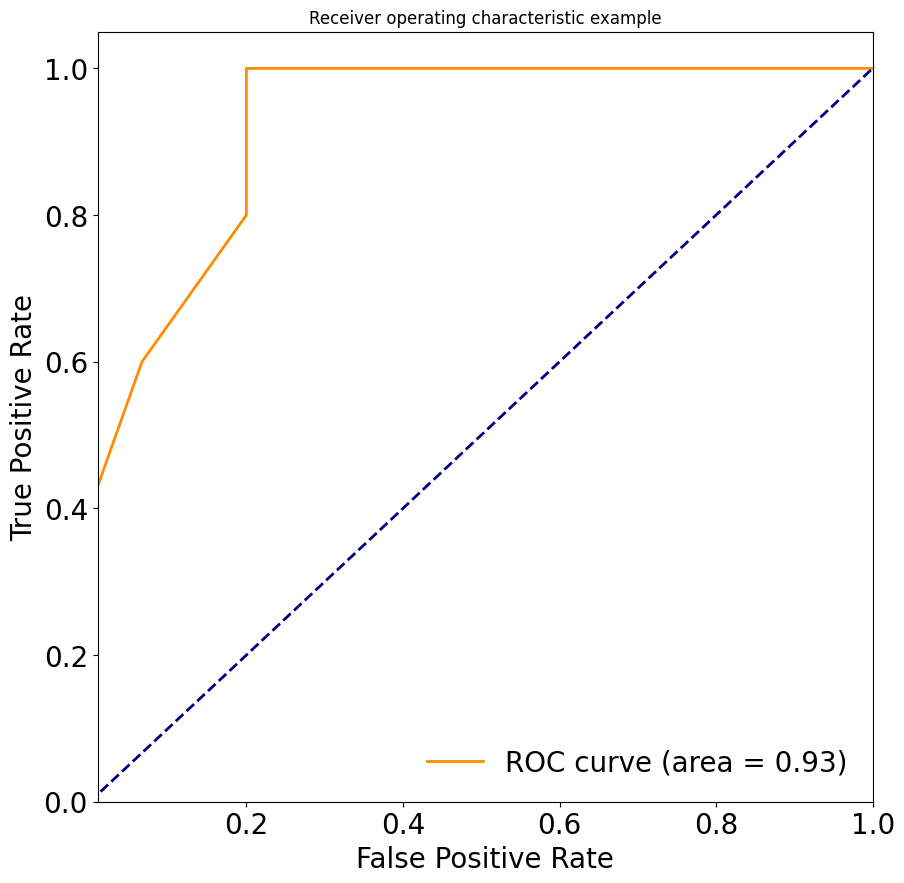

In [1290]:
#画出ROC曲线 ExtraTrees test
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

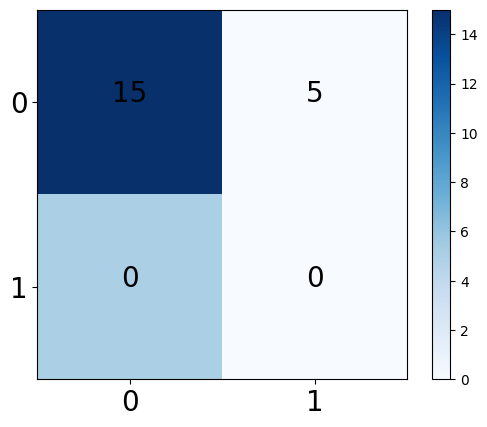

true: 15


In [1437]:
#画出混淆矩阵 ExtraTrees
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

In [309]:
#ET15_9986=clf.fit(X,y)
#pickle.dump(ET15_9986,open("ET15_9986.dat","wb"))

[0.         0.2244898  0.57142857 0.67346939 1.        ]
[0.         0.44444444 0.88888889 1.         1.        ]


<Figure size 640x480 with 0 Axes>

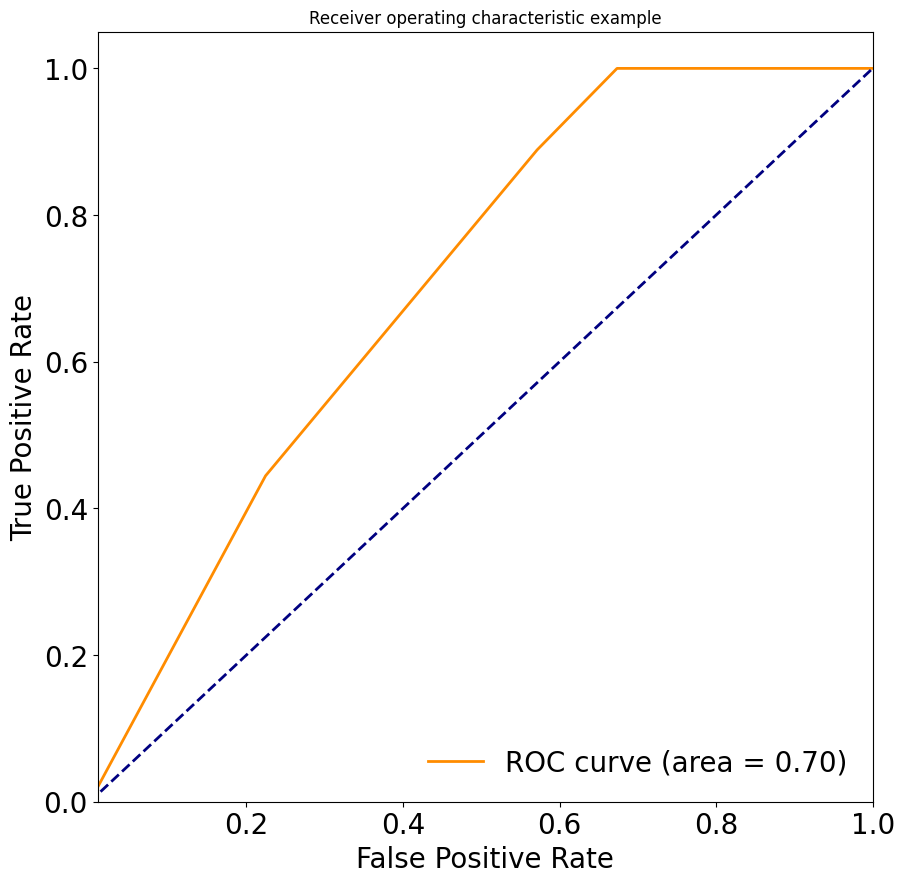

In [1228]:
#画出ROC曲线 ExtraTrees train
y_score = clf.fit(X, y).predict_proba(X_train)
fpr,tpr,threshold = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

In [311]:
#ET15_9983=clf.fit(X,y)
#pickle.dump(ET15_9983,open("ET15_9983.dat","wb"))

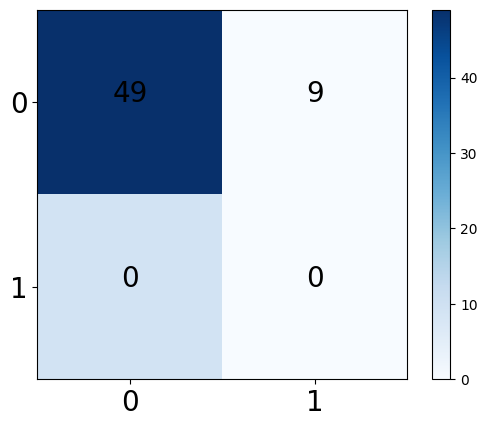

true: 49


In [1231]:
#画出混淆矩阵 RandomForest train 混淆矩阵
clf.fit(X, y)
prey=clf.predict(X_train)
true=0
for i in range(0,len(y_train)):
 if prey[i]==y_train[i]:
     true=true+1
C = confusion_matrix(y_train, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

In [340]:
ET15=clf.fit(X,y)
pickle.dump(ET15,open("ET15.dat","wb"))

In [420]:

from sklearn.datasets import make_classification


# Define the parameter grid to search over
param_grid = {
    "kernel": [1.0 * RBF(length_scale=1.0)],
    "optimizer": ['fmin_l_bfgs_b'],
    "n_restarts_optimizer": [0, 1, 2],
    "max_iter_predict": [5,10,30,40,50, 100]
}

# Create a GaussianProcessClassifier object
clf = GaussianProcessClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best estimator on the test data
print("Test accuracy:", grid_search.score(X_test, y_test))


Best parameters found: {'kernel': 1**2 * RBF(length_scale=1), 'max_iter_predict': 5, 'n_restarts_optimizer': 0, 'optimizer': 'fmin_l_bfgs_b'}
Test accuracy: 0.8125


In [79]:
clf =GaussianProcessClassifier(kernel= 1**2 * RBF(length_scale=2), max_iter_predict= 5, n_restarts_optimizer= 2, optimizer= 'fmin_l_bfgs_b')

[0.         0.11111111 0.22222222 0.22222222 1.        ]
[0. 0. 0. 1. 1.]


<Figure size 640x480 with 0 Axes>

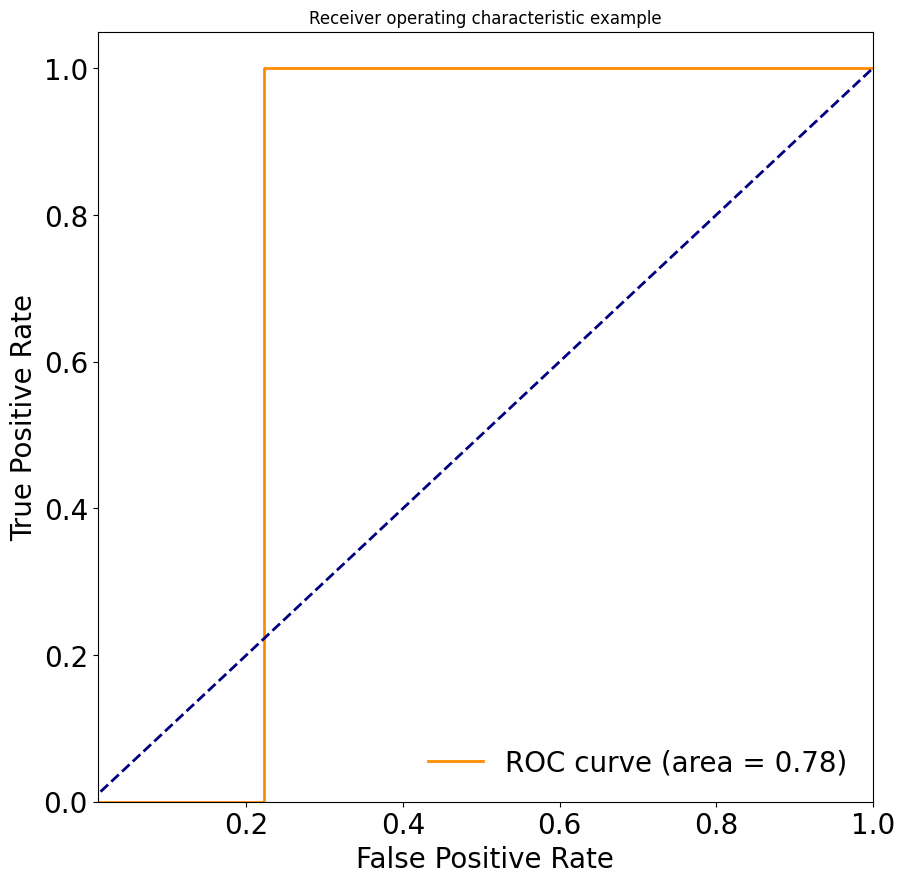

In [87]:
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

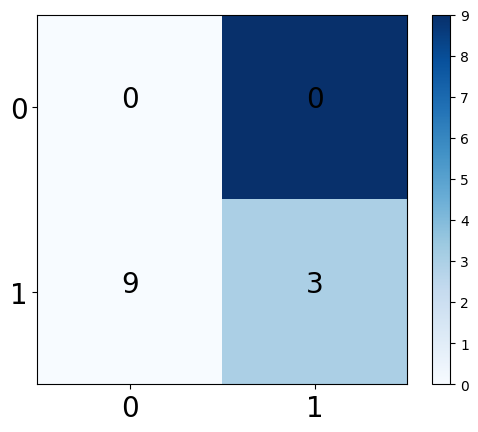

true: 3


In [81]:
#画出混淆矩阵 GaussianProcess test
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

[0.         0.         0.01818182 0.01818182 0.07272727 0.07272727
 0.12727273 0.12727273 0.23636364 0.23636364 0.32727273 0.32727273
 0.70909091 0.70909091 1.        ]
[0.         0.09090909 0.09090909 0.18181818 0.18181818 0.36363636
 0.36363636 0.72727273 0.72727273 0.81818182 0.81818182 0.90909091
 0.90909091 1.         1.        ]


<Figure size 640x480 with 0 Axes>

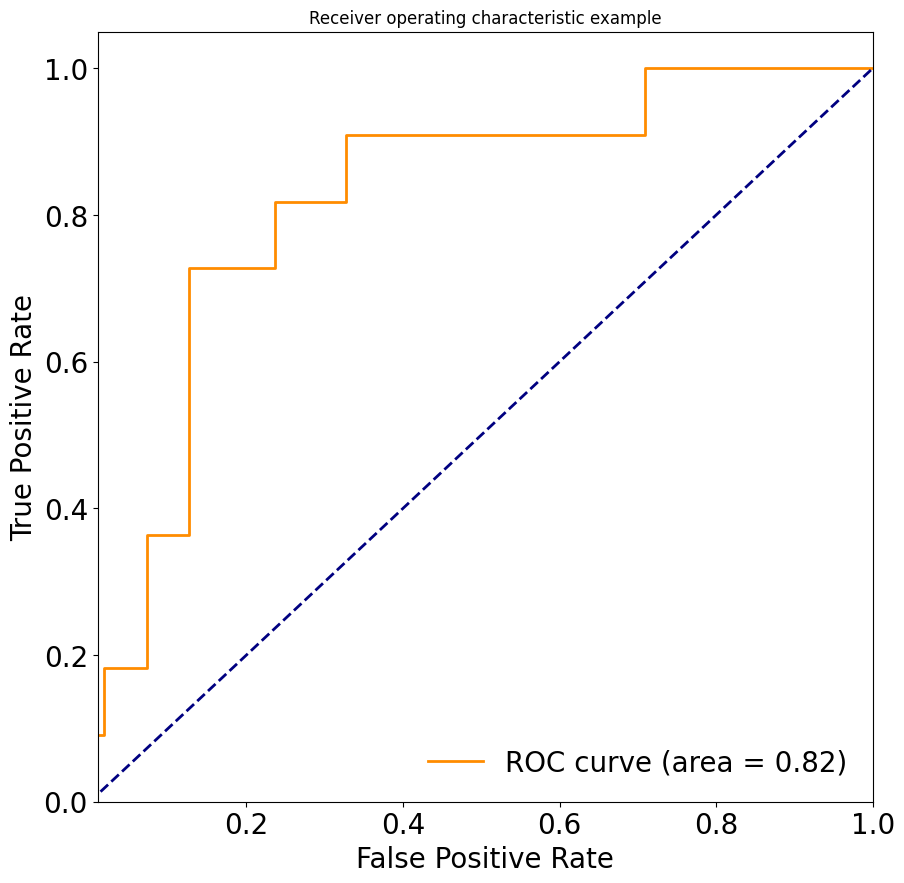

In [88]:
#画出ROC曲线 GaussianProcess train
#画出ROC曲线 RandomForest train的AUC
y_score = clf.fit(X, y).predict_proba(X_train)
fpr,tpr,threshold = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

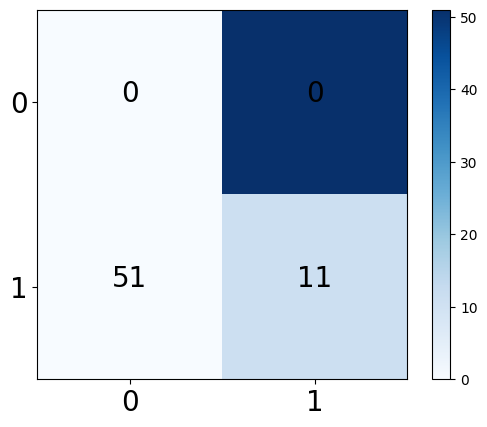

true: 11


In [142]:
#画出混淆矩阵 GaussianProcess train
clf.fit(X, y)
prey=clf.predict(X_train)
true=0
for i in range(0,len(y_train)):
 if prey[i]==y_train[i]:
     true=true+1
C = confusion_matrix(y_train, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

In [14]:
clf = KNeighborsClassifier(n_neighbors=8) 
clf.fit(X,y)

KNeighborsClassifier(n_neighbors=8)

[0. 1.]
[0. 1.]


<Figure size 640x480 with 0 Axes>

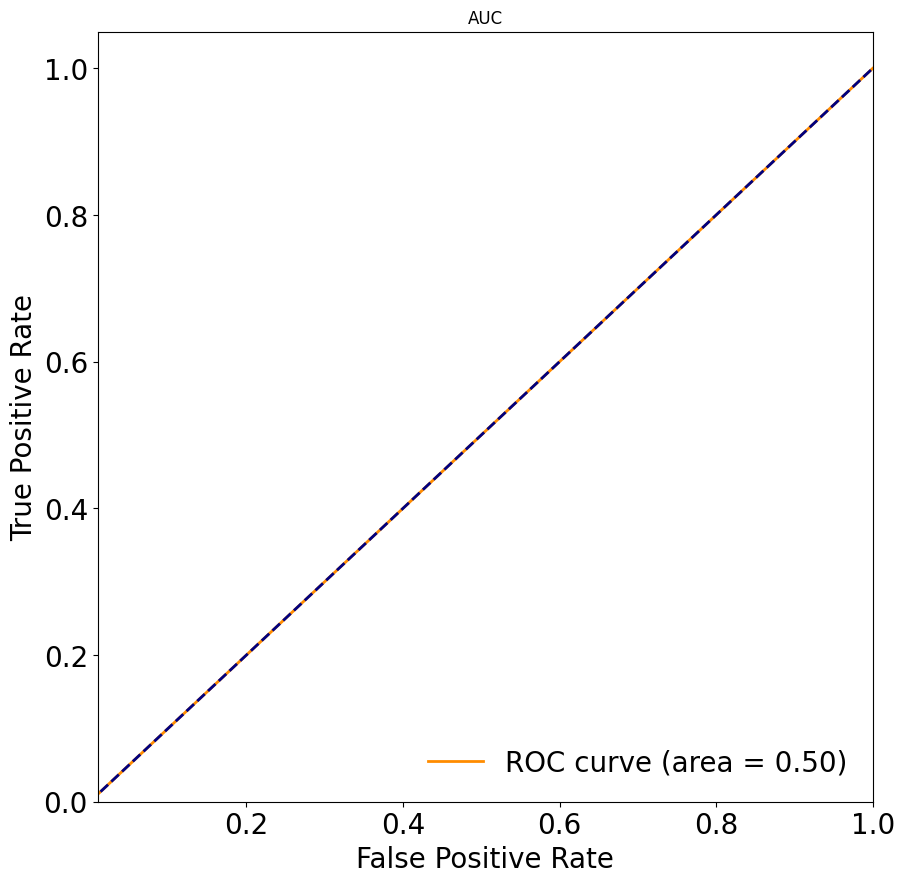

In [15]:
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('AUC')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

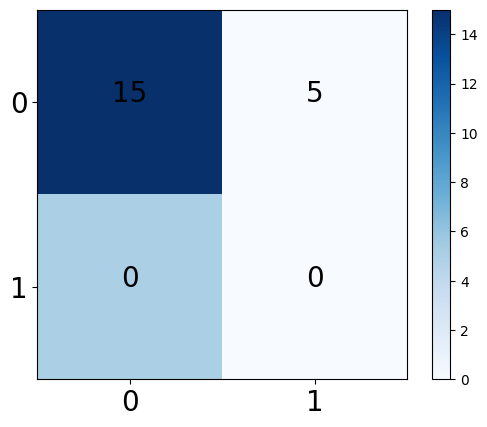

true: 15


In [11]:
#画出混淆矩阵 RandomForest test
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

Text(0, 0.5, 'Score')

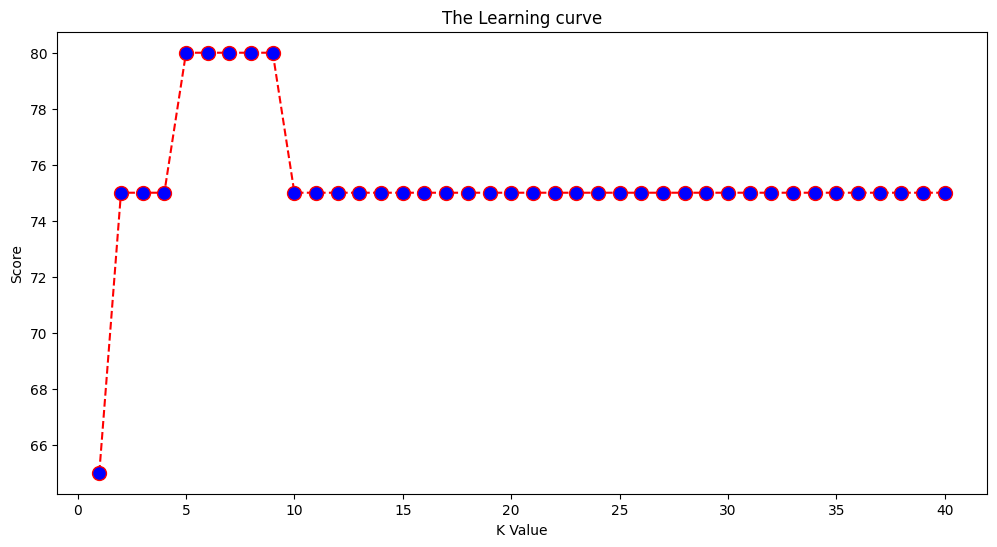

In [13]:
from sklearn.metrics import accuracy_score
score = []
for K in range(40):
    K_value = K+1
    knn = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    score.append(round(accuracy_score(y_test,y_pred)*100,2))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 41), score, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('The Learning curve')  
plt.xlabel('K Value')  
plt.ylabel('Score') 

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split



# Define the parameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15,20, None],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a DecisionTreeClassifier object
dtc = DecisionTreeClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best estimator on the test data
print("Test accuracy:", grid_search.score(X_test, y_test))


D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py3

D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py3

D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py3

D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py3

D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py3

D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py3

D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py3

D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py3

D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py3

D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
D:\anaconda\envs\py3

Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2}
Test accuracy: 0.75


D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


In [51]:
clf= DecisionTreeClassifier(criterion='gini',max_depth=5,max_features='auto',min_samples_leaf=4,min_samples_split=2) 
clf.fit(X,y)

D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=4)

[0.         0.06666667 0.6        1.        ]
[0. 0. 1. 1.]


D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

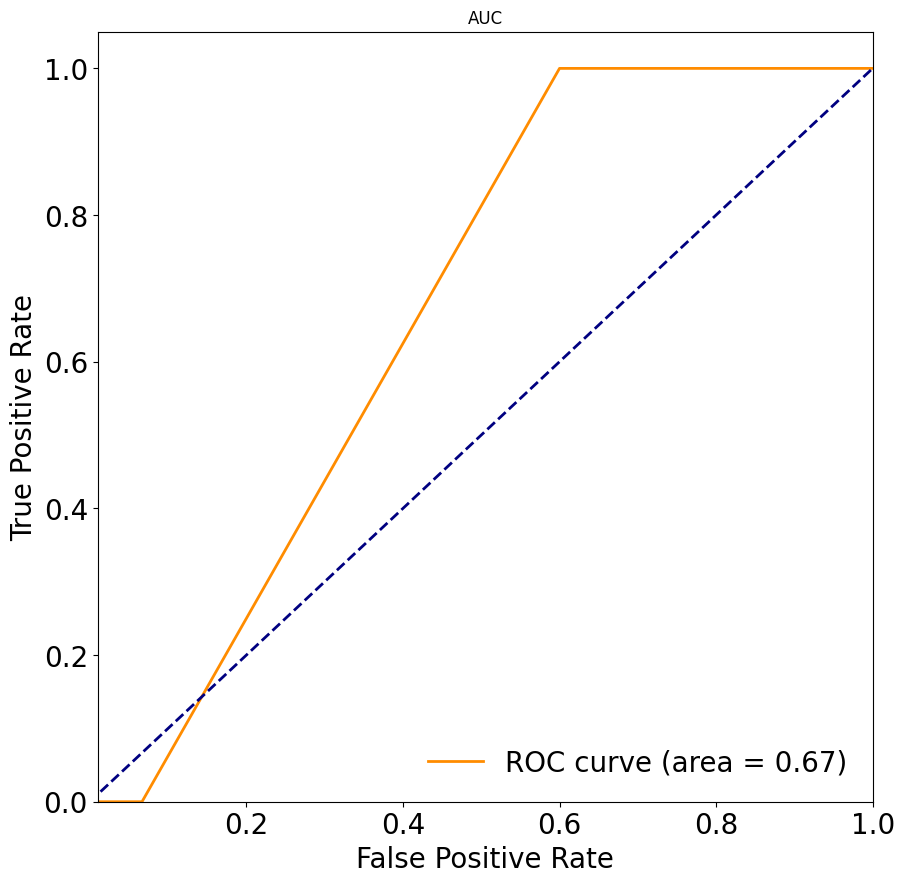

In [52]:
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('AUC')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()


D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


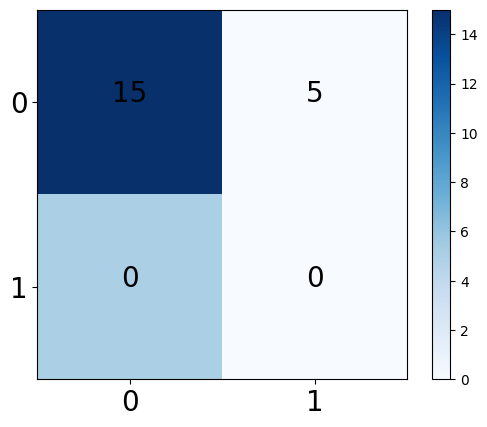

true: 15


In [53]:
#画出混淆矩阵 DecisionTreeClassifier test
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

[0.         0.97959184 1.        ]
[0. 1. 1.]


D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

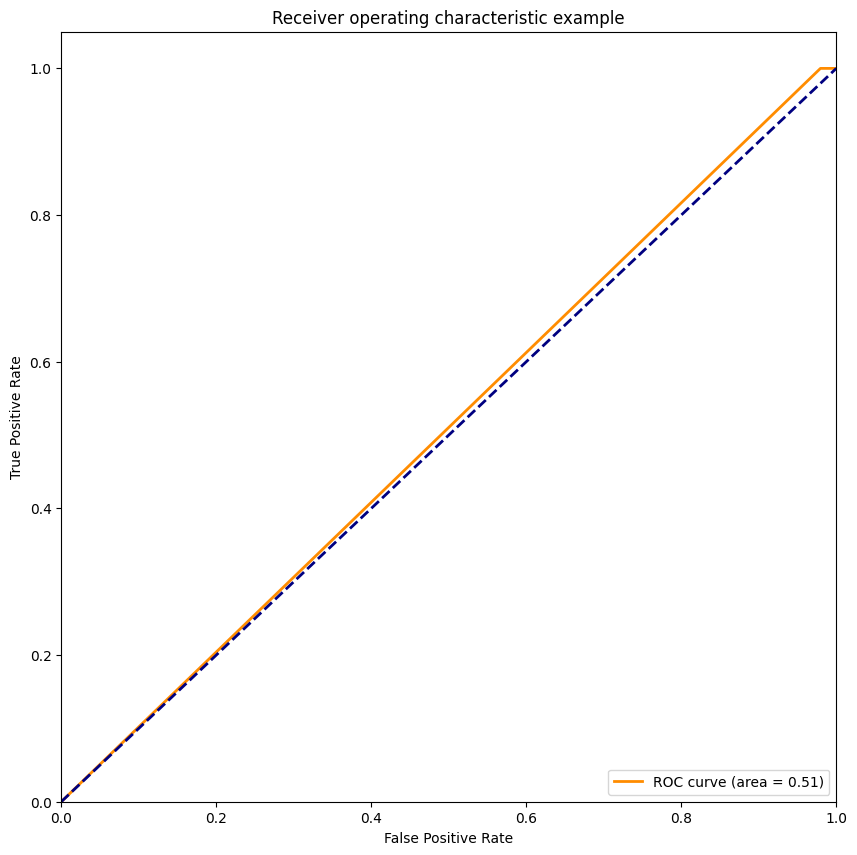

In [128]:
#画出ROC曲线 DecisionTreeClassifier train
y_score = clf.fit(X, y).predict_proba(X_train)
fpr,tpr,threshold = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

D:\anaconda\envs\py39\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


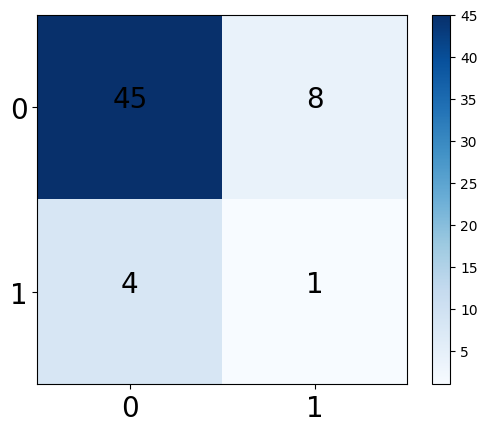

true: 46


In [35]:
#画出混淆矩阵 GaussianProcess train
clf.fit(X, y)
prey=clf.predict(X_train)
true=0
for i in range(0,len(y_train)):
 if prey[i]==y_train[i]:
     true=true+1
C = confusion_matrix(y_train, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


param_grid = {
    'C': [ 10,70,100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [ 2,3,4],
    'gamma': ['scale', 'auto']
}

# Create a SVM classifier object
svc = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters found:", grid_search.best_params_)

# Evaluate the best estimator on the test data
print("Test accuracy:", grid_search.score(X_test, y_test))


Best parameters found: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'sigmoid'}
Test accuracy: 0.7


In [37]:
clf=SVC(degree=2,kernel = 'sigmoid', C = 10,gamma='scale',probability=True)
clf.fit(X,y)

SVC(C=10, degree=2, kernel='sigmoid', probability=True)

In [38]:
svc_predictions = clf.predict(X_test)
print("Accuracy of SVM using optimized parameters ", accuracy_score(y_test,svc_predictions)*100)
print("Report : ", classification_report(y_test,svc_predictions))
print("Score : ",clf.score(X_test, y_test))

Accuracy of SVM using optimized parameters  25.0
Report :                precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        15
         1.0       0.25      1.00      0.40         5

    accuracy                           0.25        20
   macro avg       0.12      0.50      0.20        20
weighted avg       0.06      0.25      0.10        20

Score :  0.25


D:\anaconda\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\envs\py39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


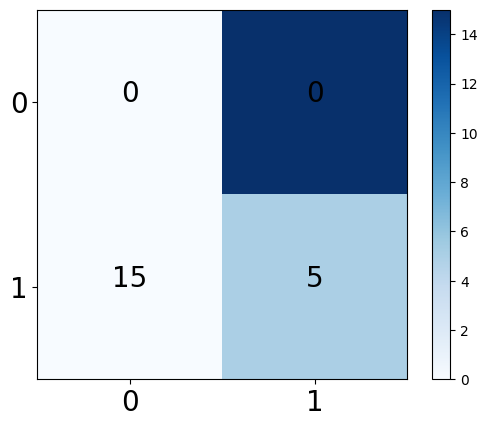

true: 5


In [43]:
clf.fit(X, y)
prey=clf.predict(X_test)
true=0
for i in range(0,len(y_test)):
 if prey[i]==y_test[i]:
     true=true+1
C = confusion_matrix(y_test, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()
print("true:",true)

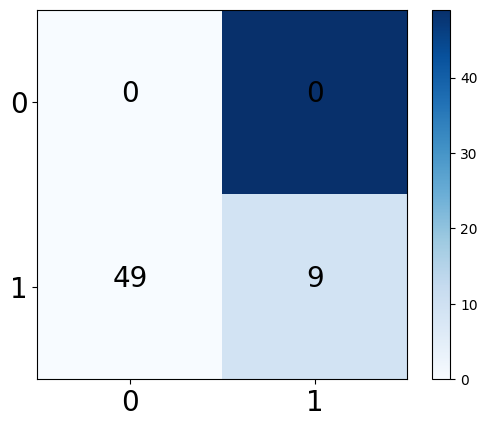

In [44]:
#画出混淆矩阵  ExtraTrees train
clf.fit(X, y)
prey=clf.predict(X_train)
true=0
for i in range(0,len(y_train)):
 if prey[i]==y_train[i]:
     true=true+1
C = confusion_matrix(y_train, prey, labels=[0,1])
plt.imshow(C, cmap=plt.cm.Blues)
indices = range(len(C))
plt.xticks(indices, [0, 1],fontsize=20)
plt.yticks(indices, [0, 1],fontsize=20)
plt.colorbar()
for first_index in range(len(C)):    #第几行
    for second_index in range(len(C)):    #第几列
        plt.text(first_index, second_index, C[first_index][second_index],fontsize=20,horizontalalignment='center')
plt.show()

[0.         0.06666667 0.26666667 0.26666667 0.53333333 0.53333333
 0.86666667 0.86666667 1.         1.        ]
[0.  0.  0.  0.2 0.2 0.6 0.6 0.8 0.8 1. ]


<Figure size 640x480 with 0 Axes>

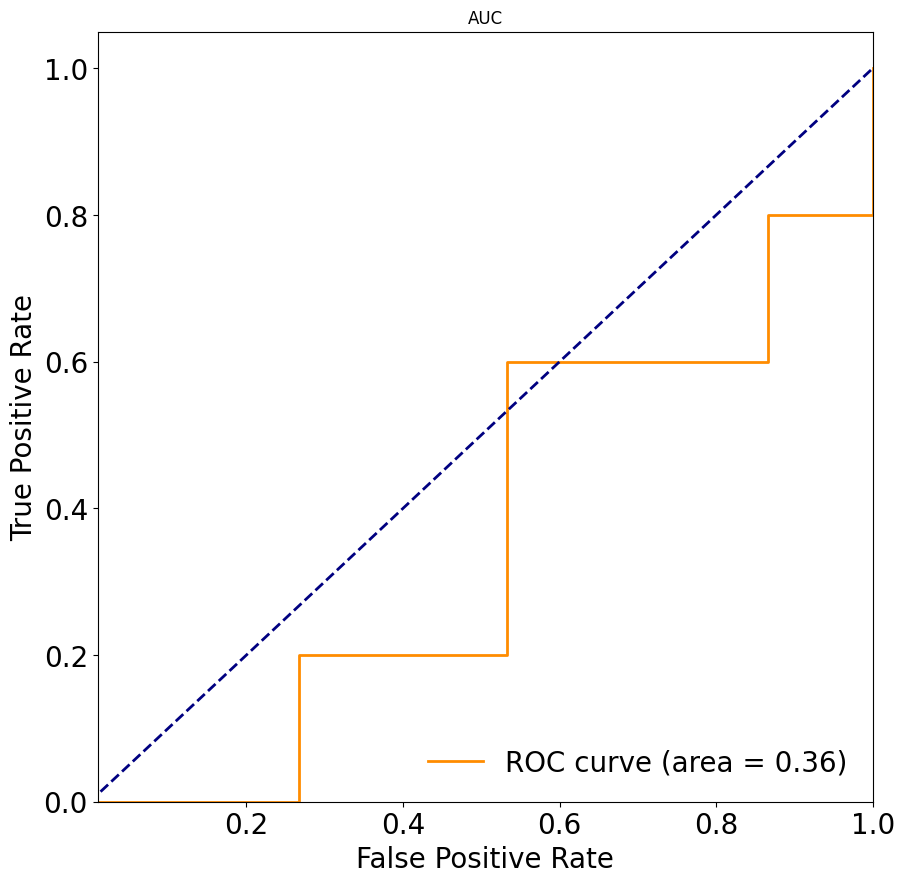

In [46]:
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.01, 1.0])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.title('AUC')
plt.legend(loc="lower right",fontsize=20,frameon=False)
plt.show()

[0.         0.02040816 0.28571429 0.28571429 0.67346939 0.67346939
 0.73469388 0.73469388 0.85714286 0.85714286 0.95918367 0.95918367
 1.         1.        ]
[0.         0.         0.         0.11111111 0.11111111 0.33333333
 0.33333333 0.44444444 0.44444444 0.77777778 0.77777778 0.88888889
 0.88888889 1.        ]


<Figure size 640x480 with 0 Axes>

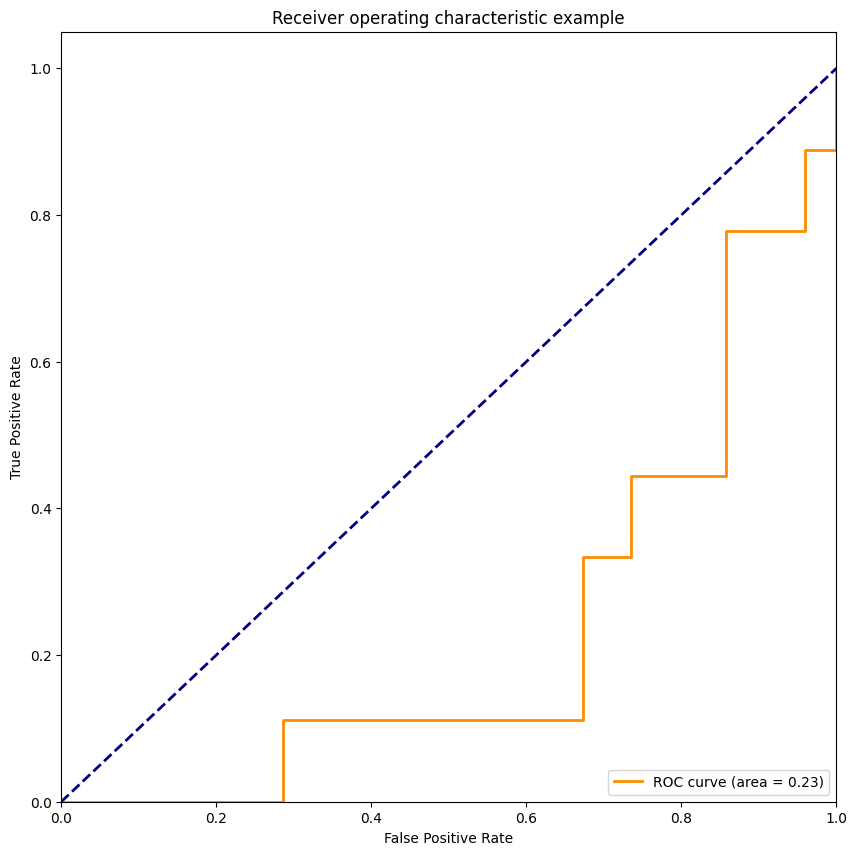

In [42]:
#画出ROC曲线 SVM train
y_score = clf.fit(X, y).predict_proba(X_train)
fpr,tpr,threshold = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()